In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

In [ ]:
data = pd.read_csv('Fraud.csv')

## Data Preprocessing

In [ ]:
data.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [ ]:
data.columns

Index(['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'merchant', 'category',
       'amt', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip',
       'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time',
       'merch_lat', 'merch_long', 'is_fraud'],
      dtype='object')

In [ ]:
data.dtypes

Unnamed: 0                 int64
trans_date_trans_time     object
cc_num                     int64
merchant                  object
category                  object
amt                      float64
first                     object
last                      object
gender                    object
street                    object
city                      object
state                     object
zip                        int64
lat                      float64
long                     float64
city_pop                   int64
job                       object
dob                       object
trans_num                 object
unix_time                  int64
merch_lat                float64
merch_long               float64
is_fraud                   int64
dtype: object

In [ ]:
#Convert date to datetime
data['trans_date_trans_time'] = pd.to_datetime(data['trans_date_trans_time'])

In [ ]:
#checking data distribution
data.describe

<bound method NDFrame.describe of          Unnamed: 0 trans_date_trans_time               cc_num  \
0                 0   2019-01-01 00:00:18     2703186189652095   
1                 1   2019-01-01 00:00:44         630423337322   
2                 2   2019-01-01 00:00:51       38859492057661   
3                 3   2019-01-01 00:01:16     3534093764340240   
4                 4   2019-01-01 00:03:06      375534208663984   
...             ...                   ...                  ...   
1296670     1296670   2020-06-21 12:12:08       30263540414123   
1296671     1296671   2020-06-21 12:12:19     6011149206456997   
1296672     1296672   2020-06-21 12:12:32     3514865930894695   
1296673     1296673   2020-06-21 12:13:36     2720012583106919   
1296674     1296674   2020-06-21 12:13:37  4292902571056973207   

                                    merchant       category     amt  \
0                 fraud_Rippin, Kub and Mann       misc_net    4.97   
1            fraud_Heller, Gutm

In [ ]:
#checking null values
data.isna().sum()

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

In [ ]:
# Droppping duplicates
data = data.drop_duplicates()

In [ ]:
#taking log of amount to remove the skewness
data['log_amount']=np.log(data['amt'])

## Feature Engineering

In [ ]:
#Creating time features for better understanding
data['hour_of_day'] = data['trans_date_trans_time'].dt.hour
data['day_of_week'] = data['trans_date_trans_time'].dt.dayofweek  # Monday=0, Sunday=6
data['month'] = data['trans_date_trans_time'].dt.month

In [ ]:
#Calculate avg amount spent on each credit card
avg_amounts = data.groupby('cc_num')['amt'].mean().reset_index()
avg_amounts.columns = ['cc_num', 'avg_amt']

# Merge the average amounts back to the original DataFrame
data = data.merge(avg_amounts, on='cc_num')

# Calculate the deviation from the average transaction amount
data['deviation'] = data['amt'] - data['avg_amt']

In [ ]:
data['deviation'] = data['deviation'].abs()

In [ ]:
data.query("is_fraud == 1")

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,unix_time,merch_lat,merch_long,is_fraud,log_amount,hour_of_day,day_of_week,month,avg_amt,deviation
5799,622765,2019-09-22 03:07:56,3534093764340240,"fraud_Schoen, Kuphal and Nitzsche",grocery_pos,352.84,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,1348283276,45.416729,-111.207220,1,5.866015,3,6,9,72.776673,280.063327
5800,624114,2019-09-22 14:34:01,3534093764340240,fraud_McGlynn-Jaskolski,misc_pos,48.03,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,1348324441,46.984508,-111.504198,1,3.871826,14,6,9,72.776673,24.746673
5801,625382,2019-09-22 22:18:34,3534093764340240,fraud_Bode-Schuster,kids_pets,2.61,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,1348352314,45.338820,-112.807848,1,0.959350,22,6,9,72.776673,70.166673
5802,625388,2019-09-22 22:21:00,3534093764340240,fraud_Kovacek Ltd,travel,6.94,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,1348352460,46.458410,-111.519546,1,1.937302,22,6,9,72.776673,65.836673
5803,625415,2019-09-22 22:30:23,3534093764340240,"fraud_Greenholt, O'Hara and Balistreri",shopping_net,1191.57,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,1348353023,45.862864,-112.848772,1,7.083027,22,6,9,72.776673,1118.793327
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1296670,1278701,2020-06-14 23:49:46,503886119844,fraud_Boyer-Reichert,shopping_net,1108.11,Cameron,Johns,M,9383 Garrison Inlet Apt. 548,...,1371253786,43.026900,-70.367103,1,7.010411,23,6,6,702.181111,405.928889
1296671,1279498,2020-06-15 05:47:16,503886119844,fraud_Strosin-Cruickshank,grocery_pos,312.87,Cameron,Johns,M,9383 Garrison Inlet Apt. 548,...,1371275236,44.373888,-69.216299,1,5.745788,5,0,6,702.181111,389.311111
1296672,1281460,2020-06-15 16:57:49,503886119844,fraud_Kuphal-Bartoletti,misc_net,810.70,Cameron,Johns,M,9383 Garrison Inlet Apt. 548,...,1371315469,44.065434,-70.054754,1,6.697898,16,0,6,702.181111,108.518889
1296673,1282523,2020-06-15 22:14:17,503886119844,"fraud_Baumbach, Feeney and Morar",shopping_net,899.48,Cameron,Johns,M,9383 Garrison Inlet Apt. 548,...,1371334457,44.007561,-70.106514,1,6.801817,22,0,6,702.181111,197.298889


In [ ]:
# Frequency of transactions in the last day
current_time = data['trans_date_trans_time'].max()  # Get the latest transaction time
last_day_transactions = data[data['trans_date_trans_time'] > (current_time - pd.Timedelta(days=1))]

transaction_counts_last_day = last_day_transactions.groupby('cc_num').size().reset_index(name='transaction_count_last_day')

data = data.merge(transaction_counts_last_day, on='cc_num', how='left')

In [ ]:
#Frequency of transcation for last hour
last_hour_transactions = data[data['trans_date_trans_time'] > (current_time - pd.Timedelta(hours=1))]

transaction_counts_last_hour = last_hour_transactions.groupby('cc_num').size().reset_index(name='transaction_count_last_hour')

data = data.merge(transaction_counts_last_hour, on='cc_num', how='left')

In [ ]:

# Function to calculate the Haversine distance
def haversine(lat1, lon1, lat2, lon2):
    # Convert degrees to radians
    lat1, lon1, lat2, lon2 = map(np.radians, [lat1, lon1, lat2, lon2])

    # Haversine formula
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    a = np.sin(dlat / 2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon / 2)**2
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1 - a))

    # Earth radius in kilometers
    r = 6371.0
    return r * c

#Calculate distance between consecutive transactions
data['distance'] = data.apply(
    lambda row: haversine(row['lat'], row['long'], row['merch_lat'], row['merch_long']), axis=1
)


In [ ]:
# Flag Night Transaction
# Define business hours (9 AM to 5 PM)
business_start = pd.Timestamp('09:00:00').time()
business_end = pd.Timestamp('17:00:00').time()

# Flag transactions outside business hours
data['is_night_transaction'] = data['trans_date_trans_time'].apply(
    lambda x: not (business_start <= x.time() <= business_end)
)

## Exploratory Data Analysis

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt


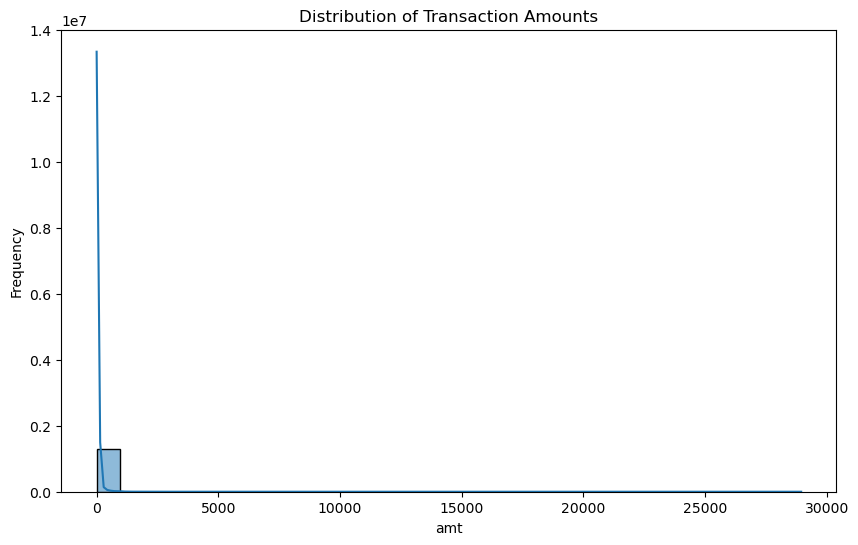

In [ ]:
# Plot distribution of transaction amounts
plt.figure(figsize=(10, 6))
sns.histplot(data['amt'], bins=30, kde=True)
plt.title('Distribution of Transaction Amounts')
plt.xlabel('amt')
plt.ylabel('Frequency')
plt.show()

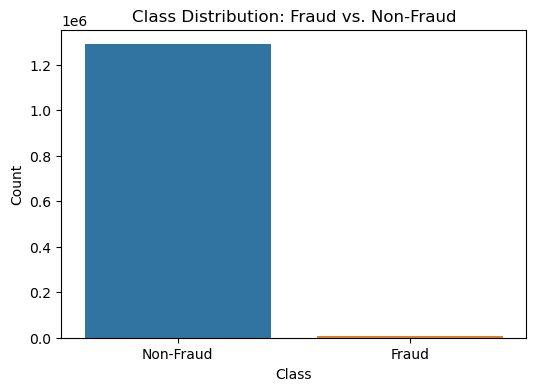

In [ ]:
# Plot class distribution
plt.figure(figsize=(6, 4))
sns.countplot(x='is_fraud', data=data)
plt.title('Class Distribution: Fraud vs. Non-Fraud')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks([0, 1], ['Non-Fraud', 'Fraud'])
plt.show()

C:\Users\onkar\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


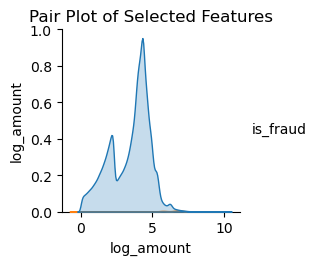

In [ ]:
# Select features for pair plot
features = ['log_amount']
sns.pairplot(data[features + ['is_fraud']], hue='is_fraud')
plt.title('Pair Plot of Selected Features')
plt.ylabel('is_fraud')
plt.show()

C:\Users\onkar\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


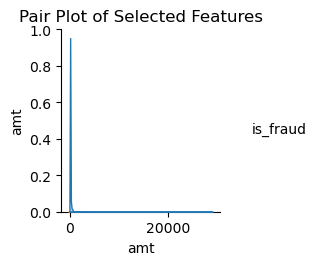

In [ ]:
# Select features for pair plot
features = ['amt']
sns.pairplot(data[features + ['is_fraud']], hue='is_fraud')
plt.title('Pair Plot of Selected Features')
plt.ylabel('is_fraud')
plt.show()

C:\Users\onkar\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


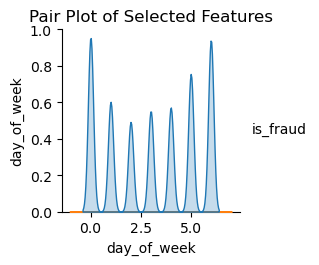

In [ ]:
# Select features for pair plot
features = ['day_of_week']
sns.pairplot(data[features + ['is_fraud']], hue='is_fraud')
plt.title('Pair Plot of Selected Features')
plt.ylabel('is_fraud')
plt.show()

C:\Users\onkar\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


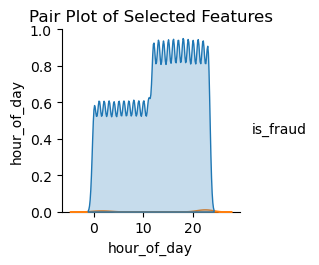

In [ ]:
# Select features for pair plot
features = ['hour_of_day']
sns.pairplot(data[features + ['is_fraud']], hue='is_fraud')
plt.title('Pair Plot of Selected Features')
plt.ylabel('is_fraud')
plt.show()

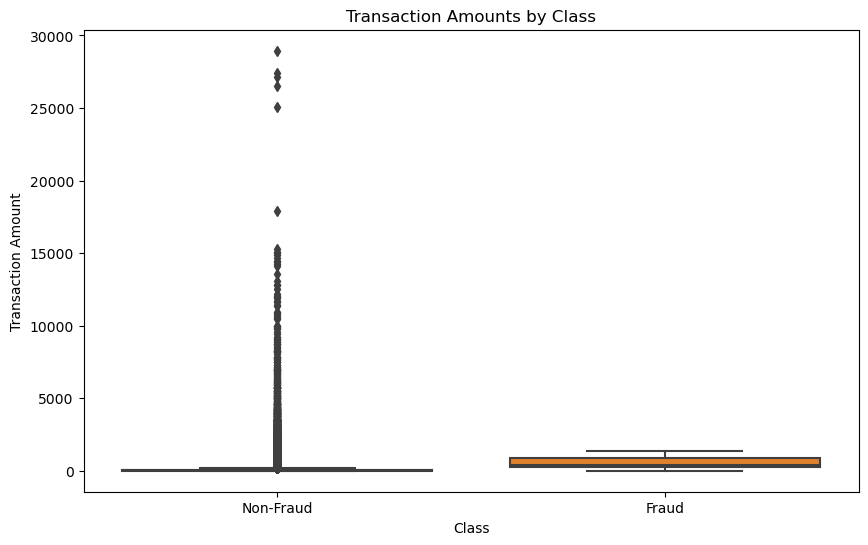

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='is_fraud', y='amt', data=data)
plt.title('Transaction Amounts by Class')
plt.xlabel('Class')
plt.ylabel('Transaction Amount')
plt.xticks([0, 1], ['Non-Fraud', 'Fraud'])
plt.show()

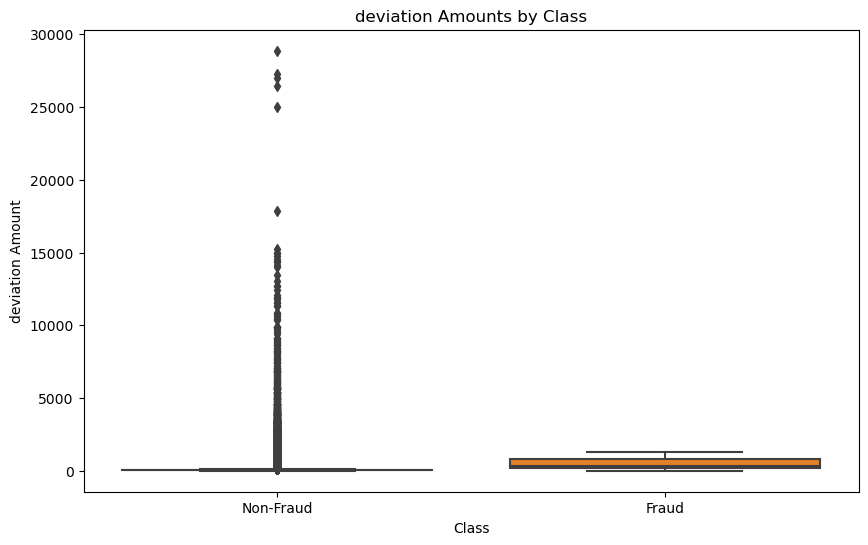

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='is_fraud', y='deviation', data=data)
plt.title('deviation Amounts by Class')
plt.xlabel('Class')
plt.ylabel('deviation Amount')
plt.xticks([0, 1], ['Non-Fraud', 'Fraud'])
plt.show()

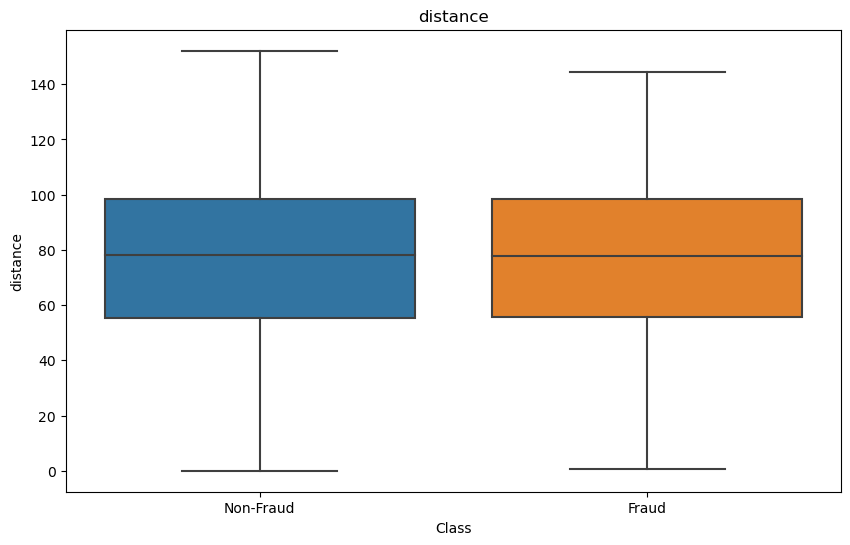

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='is_fraud', y='distance', data=data)
plt.title('distance')
plt.xlabel('Class')
plt.ylabel('distance')
plt.xticks([0, 1], ['Non-Fraud', 'Fraud'])
plt.show()

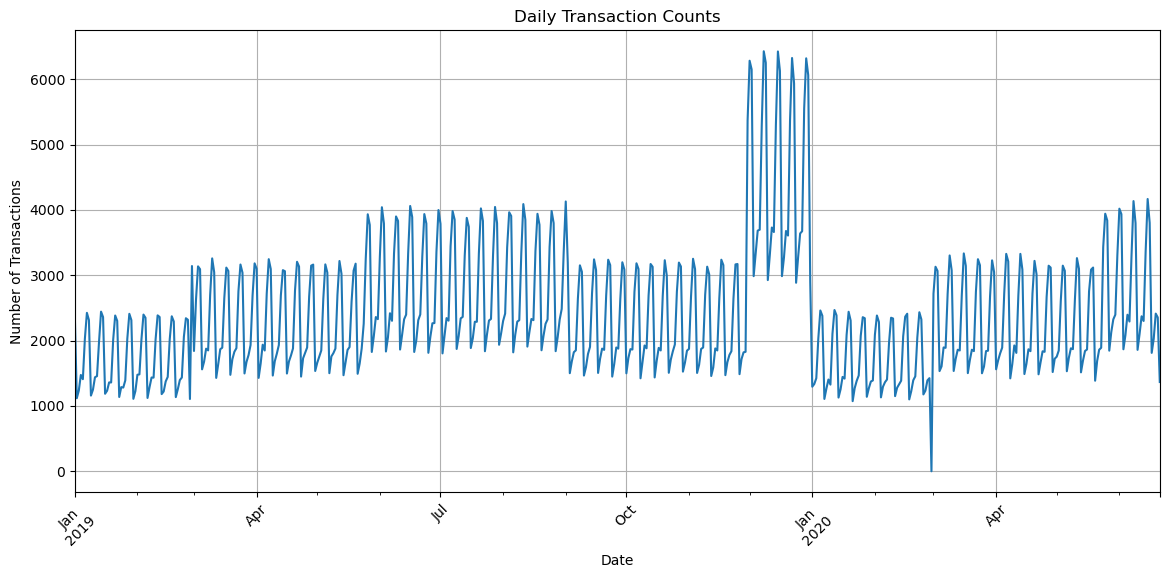

In [ ]:
data['trans_date_trans_time'] = pd.to_datetime(data['trans_date_trans_time'])
data.set_index('trans_date_trans_time', inplace=True)

# Resample the data to daily counts
daily_counts = data.resample('D').size()

# Plot daily transaction counts
plt.figure(figsize=(14, 6))
daily_counts.plot()
plt.title('Daily Transaction Counts')
plt.xlabel('Date')
plt.ylabel('Number of Transactions')
plt.xticks(rotation=45)
plt.grid()
plt.show()

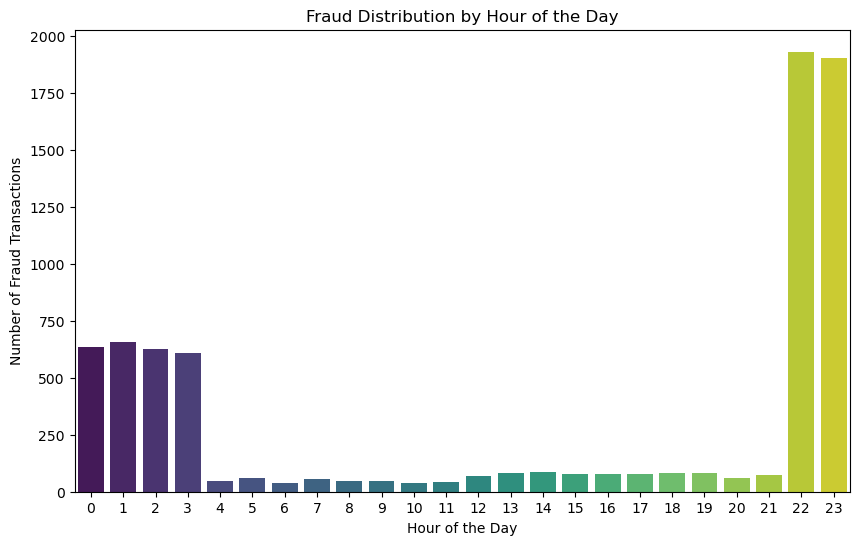

In [ ]:
# Filter fraud transactions
fraud_data = data[data['is_fraud'] == 1]

#1. Fraud Distribution by Hour of the Day
plt.figure(figsize=(10, 6))
sns.countplot(x='hour_of_day', data=fraud_data, palette='viridis')
plt.title('Fraud Distribution by Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Fraud Transactions')
plt.show()


C:\Users\onkar\AppData\Local\Temp\ipykernel_13920\954091239.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fraud_data['day_of_week'] = fraud_data['day_of_week'].map(day_of_week_map)


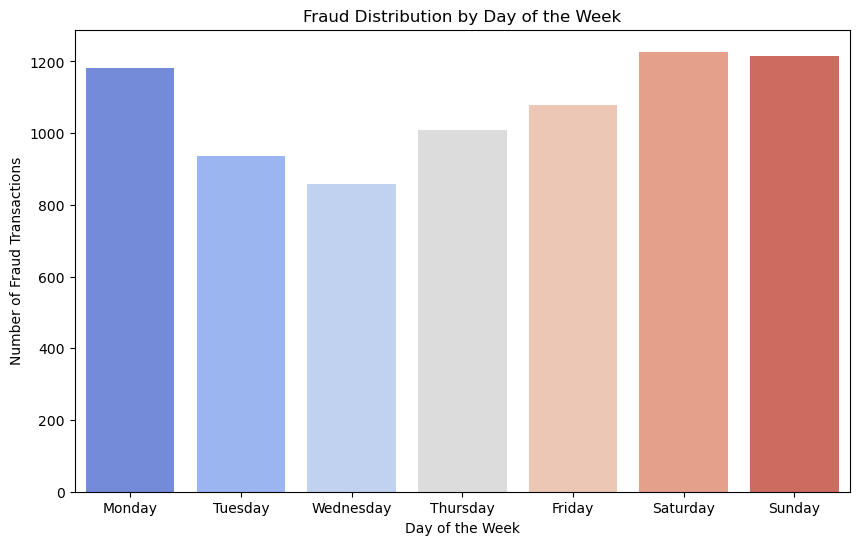

In [ ]:
# 2. Fraud Distribution by Day of the Week
day_of_week_map = {0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday', 4: 'Friday', 5: 'Saturday', 6: 'Sunday'}
fraud_data['day_of_week'] = fraud_data['day_of_week'].map(day_of_week_map)
plt.figure(figsize=(10, 6))
sns.countplot(x='day_of_week', data=fraud_data, palette='coolwarm', order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.title('Fraud Distribution by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Fraud Transactions')
plt.show()

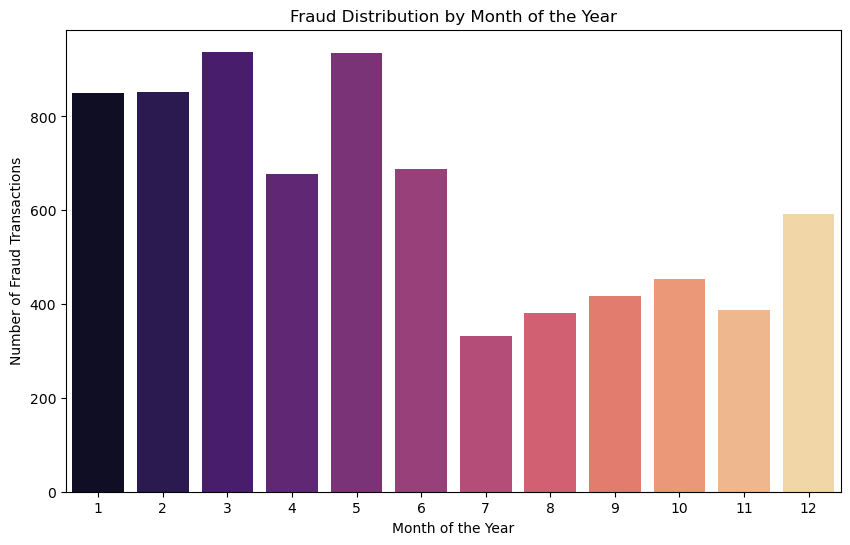

In [ ]:
# Fraud Distribution by Month of the Year
plt.figure(figsize=(10, 6))
sns.countplot(x='month', data=fraud_data, palette='magma')
plt.title('Fraud Distribution by Month of the Year')
plt.xlabel('Month of the Year')
plt.ylabel('Number of Fraud Transactions')
plt.show()

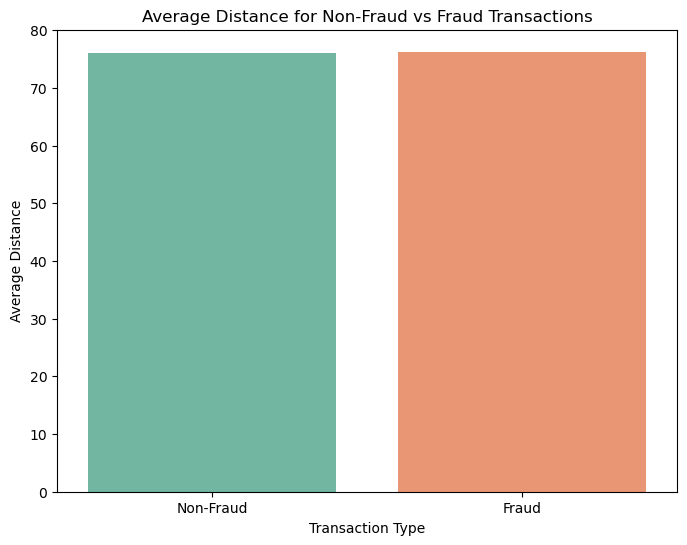

In [ ]:
average_distance = data.groupby('is_fraud')['distance'].mean().reset_index()

average_distance['is_fraud'] = average_distance['is_fraud'].replace({0: 'Non-Fraud', 1: 'Fraud'})

# Plot the average distance for fraud and non-fraud transactions
plt.figure(figsize=(8, 6))
sns.barplot(x='is_fraud', y='distance', data=average_distance, palette='Set2')

plt.title('Average Distance for Non-Fraud vs Fraud Transactions')
plt.xlabel('Transaction Type')
plt.ylabel('Average Distance')
plt.show()

## Feature Selection

In [ ]:
from sklearn.preprocessing import LabelEncoder


# One-Hot Encode 'job' and 'category' columns
data_encoded = pd.get_dummies(data, columns=['category'], drop_first=True)

# Label Encoding for 'gender'

# Initialize LabelEncoder
le = LabelEncoder()

# Fit and transform the 'gender' column
data_encoded['gender'] = le.fit_transform(data['gender'])

In [ ]:
data_encoded.columns

Index(['Unnamed: 0', 'cc_num', 'merchant', 'amt', 'first', 'last', 'gender',
       'street', 'city', 'state', 'zip', 'lat', 'long', 'city_pop', 'job',
       'dob', 'trans_num', 'unix_time', 'merch_lat', 'merch_long', 'is_fraud',
       'log_amount', 'hour_of_day', 'day_of_week', 'month', 'avg_amt',
       'deviation', 'transaction_count_last_day',
       'transaction_count_last_hour', 'distance', 'is_night_transaction',
       'category_food_dining', 'category_gas_transport',
       'category_grocery_net', 'category_grocery_pos',
       'category_health_fitness', 'category_home', 'category_kids_pets',
       'category_misc_net', 'category_misc_pos', 'category_personal_care',
       'category_shopping_net', 'category_shopping_pos', 'category_travel'],
      dtype='object')

In [ ]:
corr_columns = ['is_fraud',
       'log_amount', 'hour_of_day', 'day_of_week', 'month', 'avg_amt',
       'deviation', 'transaction_count_last_day',
       'transaction_count_last_hour', 'distance','amt','gender']

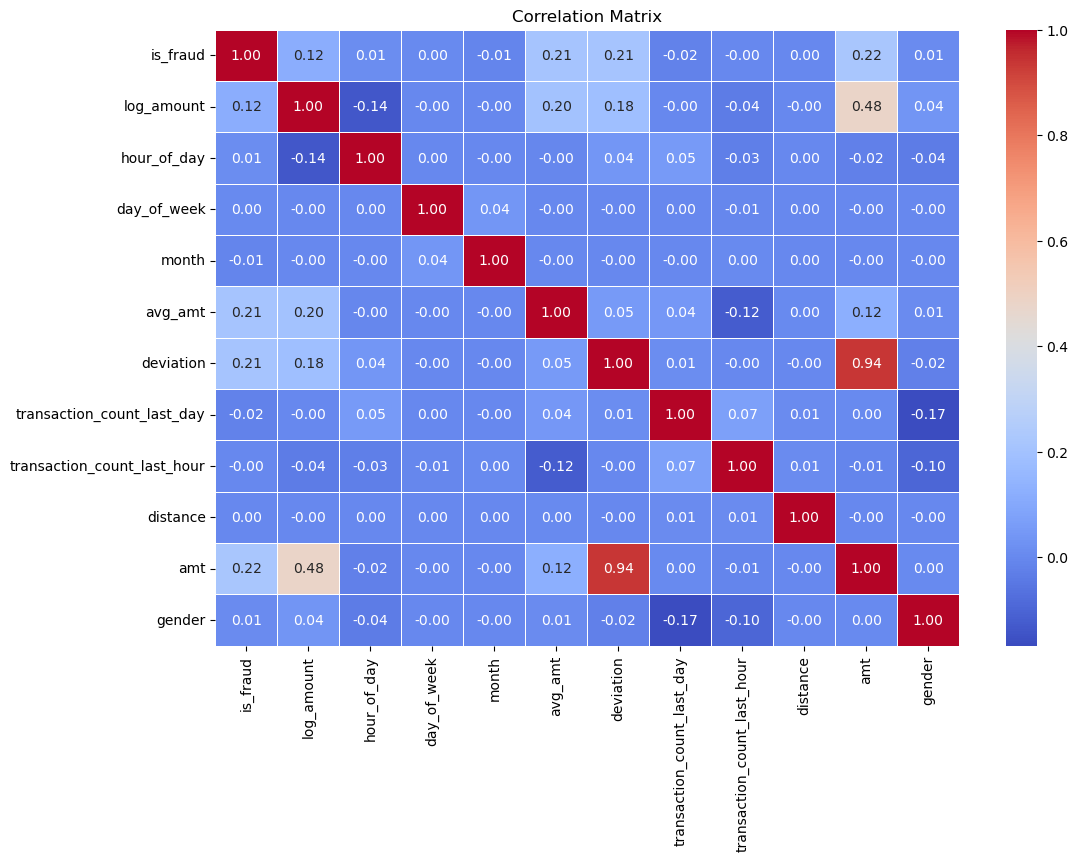

In [ ]:
# Heatmap
# Now run the correlation analysis
correlation_matrix = data_encoded[corr_columns].corr()

# Plot the heatmap to visualize the correlation matrix
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

In [ ]:
# Entropy Calculation
def calculate_conditional_entropy(data, feature_col, target_col='is_fraud'):
    #Calculate the joint distribution of each feature value with the target
    joint_prob = data.groupby([feature_col, target_col]).size() / len(data)
    #Calculate the marginal probability of the target
    marginal_prob = data[target_col].value_counts() / len(data)
    #Calculate the conditional entropy
    conditional_entropy = 0
    for (feature_val, target_val), prob in joint_prob.items():
        if prob > 0:  #Avoid log(0) issue
            conditional_entropy += prob * np.log2(marginal_prob[target_val] / prob)
    return conditional_entropy

#Calculate conditional entropy for each column with respect to 'is_fraud' and store results
entropy_values = {col: calculate_conditional_entropy(data, col, 'is_fraud') for col in data.columns if col != 'is_fraud'}

#Sort the dictionary by entropy values in ascending order
sorted_entropy_values = dict(sorted(entropy_values.items(), key=lambda item: item[1]))

for i in range(2):
    print(f"Lowest entropy columns at Column '{list(sorted_entropy_values.keys())[i]}' has an entropy of {list(sorted_entropy_values.values())[i]}")

Lowest entropy columns at Column 'transaction_count_last_hour' has an entropy of 0.4682844911363325
Lowest entropy columns at Column 'is_night_transaction' has an entropy of 0.9317194835684716


In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Load your preprocessed dataset
# X = features, y = target (fraud column)
num_columns =  ['is_fraud',
       'log_amount', 'hour_of_day', 'day_of_week', 'month', 'avg_amt',
       'deviation', 'distance','amt','gender']
X = data_encoded[num_columns].drop('is_fraud', axis=1)
y = data_encoded['is_fraud']

# Initialize RandomForestClassifier with optimizations
rf = RandomForestClassifier(n_estimators=20, max_depth=10, random_state=42, n_jobs=-1)

# Train the model on a sample of data (if necessary)
rf.fit(X, y)

# Get feature importance
feature_importance = rf.feature_importances_

# Create a DataFrame for visualization
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importance
}).sort_values(by='Importance', ascending=False)

# Print or plot feature importance as needed
print(feature_importance_df)

       Feature  Importance
7          amt    0.262887
1  hour_of_day    0.222017
0   log_amount    0.180226
5    deviation    0.146061
4      avg_amt    0.145662
8       gender    0.020517
6     distance    0.009838
3        month    0.008128
2  day_of_week    0.004664


In [ ]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

# Initialize a logistic regression model
model = LogisticRegression(max_iter=1000)

# Initialize RFE and fit it to the data
rfe = RFE(model, n_features_to_select=10)  # Select top 10 features
rfe = rfe.fit(X, y)

# Get the selected features
selected_features = X.columns[rfe.support_]
print("Selected Features: ", selected_features)

# Check the ranking of features
print("Feature Ranking: ", rfe.ranking_)

Selected Features:  Index(['log_amount', 'hour_of_day', 'day_of_week', 'month', 'avg_amt',
       'deviation', 'distance', 'amt', 'gender'],
      dtype='object')
Feature Ranking:  [1 1 1 1 1 1 1 1 1]


In [ ]:
data_encoded[corr_columns].isna().sum()

is_fraud                             0
log_amount                           0
hour_of_day                          0
day_of_week                          0
month                                0
avg_amt                              0
deviation                            0
transaction_count_last_day       78313
transaction_count_last_hour    1098651
distance                             0
amt                                  0
gender                               0
dtype: int64

## Model Training and Model Selection

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.92      0.96    257834
           1       0.06      0.81      0.11      1501

    accuracy                           0.92    259335
   macro avg       0.53      0.87      0.54    259335
weighted avg       0.99      0.92      0.96    259335

Accuracy Score: 0.9242022866176952
ROC-AUC Score: 0.8658406244545828


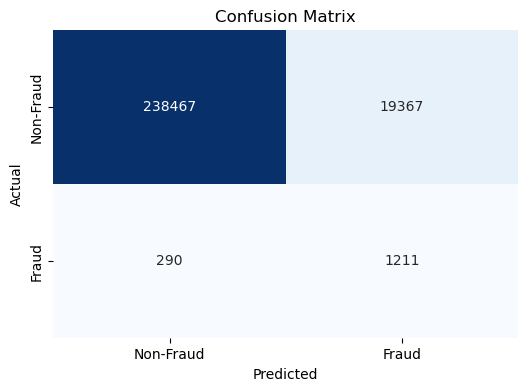

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, accuracy_score

# Splitting the Data with Stratification
X = data_encoded[num_columns].drop('is_fraud', axis=1)  # Replace 'fraud' with your target column name
y = data_encoded['is_fraud']

# Perform stratified split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Standardize the features (Logistic regression works better with standardized data)
scaler = StandardScaler()

# Fit the scaler on the training data and transform both train and test data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train Logistic Regression Model
log_reg = LogisticRegression(max_iter=1000, random_state=42, class_weight='balanced')

# Fit the model to the training data
log_reg.fit(X_train_scaled, y_train)

# Make Predictions on the Test Data
y_pred = log_reg.predict(X_test_scaled)

# Model Evaluation
# Print Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Print Accuracy Score
print("Accuracy Score:", accuracy_score(y_test, y_pred))

# Calculate ROC AUC score
roc_auc = roc_auc_score(y_test, y_pred)
print("ROC-AUC Score:", roc_auc)

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False, xticklabels=["Non-Fraud", "Fraud"], yticklabels=["Non-Fraud", "Fraud"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()
